In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

jj_data = pd.read_csv('/content/drive/MyDrive/꿔8로우/예측용데이터/도로교통공단_제주도 개별 교통사고 상세정보_20171231.csv', sep=',', encoding='euc-kr')
jj_data.head(10)

,발생일,발생시간,요일,발생지_시도,발생지_시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해자성별,가해자연령,가해자신체상해정도,피해차종,피해자성별,피해자연령,피해자신체상해정도
0,2017-01-01,0,일,제주,제주시,경상,0,0,1,0,차대차,추돌,추돌,안전운전 의무 불이행,포장,건조,맑음,교차로,교차로부근,승용차,남,34세,상해없음,승용차,남,21세,경상
1,2017-01-01,3,일,제주,제주시,경상,0,0,3,0,차량단독,전도전복,전도전복,안전운전 의무 불이행,포장,건조,맑음,단일로,기타단일로,승용차,남,26세,경상,없음,없음,불명,없음
2,2017-01-01,8,일,제주,제주시,경상,0,0,1,0,차대사람,기타,기타,보행자 보호의무 위반,포장,건조,맑음,단일로,기타단일로,승용차,남,59세,상해없음,보행자,남,21세,경상
3,2017-01-01,10,일,제주,제주시,경상,0,0,1,0,차대차,기타,기타,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,화물차,남,64세,상해없음,승용차,남,53세,경상
4,2017-01-01,10,일,제주,제주시,경상,0,0,1,0,차대차,측면충돌,측면충돌,기타,포장,건조,맑음,교차로,교차로내,승용차,남,67세,상해없음,화물차,남,62세,경상
5,2017-01-01,11,일,제주,서귀포시,경상,0,0,1,0,차대차,측면충돌,측면충돌,안전운전 의무 불이행,포장,건조,맑음,주차장,주차장,화물차,남,76세,상해없음,원동기장치자전거,여,62세,경상
6,2017-01-01,15,일,제주,제주시,부상신고,0,0,0,1,차대차,기타,기타,안전운전 의무 불이행,포장,건조,맑음,기타,기타,승용차,남,29세,상해없음,승용차,남,25세,부상신고
7,2017-01-01,18,일,제주,제주시,중상,0,1,0,0,차대사람,차도통행중,차도통행중,보행자 보호의무 위반,포장,건조,기타/불명,단일로,기타단일로,승용차,남,42세,상해없음,보행자,남,70세,중상
8,2017-01-01,18,일,제주,서귀포시,사망,1,1,1,0,차대차,측면충돌,측면충돌,안전운전 의무 불이행,포장,건조,맑음,단일로,기타단일로,승용차,남,30세,경상,화물차,남,39세,기타불명
9,2017-01-01,21,일,제주,서귀포시,중상,0,1,0,0,차량단독,전도전복,전도전복,안전운전 의무 불이행,포장,건조,맑음,교차로,교차로내,승용차,남,48세,중상,없음,없음,불명,없음


In [ ]:
jj_data.columns

Index(['발생일', '발생시간', '요일', '발생지_시도', '발생지_시군구', '사고내용', '사망자수', '중상자수',
       '경상자수', '부상신고자수', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '노면상태_대분류',
       '노면상태', '기상상태', '도로형태_대분류', '도로형태', '가해자차종', '가해자성별', '가해자연령',
       '가해자신체상해정도', '피해차종', '피해자성별', '피해자연령', '피해자신체상해정도'],
      dtype='object')

In [ ]:
jj_data.rename(columns={'가해자성별':'가해성별','피해차종':'피해자차종'},inplace=True)

In [ ]:
jj_data.head()

,발생일,발생시간,요일,발생지_시도,발생지_시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도
0,2017-01-01,0,일,제주,제주시,경상,0,0,1,0,차대차,추돌,추돌,안전운전 의무 불이행,포장,건조,맑음,교차로,교차로부근,승용차,남,34세,상해없음,승용차,남,21세,경상
1,2017-01-01,3,일,제주,제주시,경상,0,0,3,0,차량단독,전도전복,전도전복,안전운전 의무 불이행,포장,건조,맑음,단일로,기타단일로,승용차,남,26세,경상,없음,없음,불명,없음
2,2017-01-01,8,일,제주,제주시,경상,0,0,1,0,차대사람,기타,기타,보행자 보호의무 위반,포장,건조,맑음,단일로,기타단일로,승용차,남,59세,상해없음,보행자,남,21세,경상
3,2017-01-01,10,일,제주,제주시,경상,0,0,1,0,차대차,기타,기타,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,화물차,남,64세,상해없음,승용차,남,53세,경상
4,2017-01-01,10,일,제주,제주시,경상,0,0,1,0,차대차,측면충돌,측면충돌,기타,포장,건조,맑음,교차로,교차로내,승용차,남,67세,상해없음,화물차,남,62세,경상


In [ ]:
# 발생시간을 00:00꼴의 형태로 변환하기 위해서, 계속 고민하고 있었는데, 천사같은 민정님 덕분에 쉽게 해결하였습니다. 넘넘 고마워용^^
# (발생일_시간, 발생일_시간_시군구 칼럼에 추가해야 하잖아요!)
jj_data['발생시간'] = [f"{i:#02d}:00" for i in list(jj_data['발생시간'])]

In [ ]:
jj_data['발생일']=[str(i) for i in jj_data['발생일']]
jj_data['발생일_시간'] = jj_data['발생일']+" "+ jj_data['발생시간'].astype(str)
jj_data['발생일_시간_시군구'] = jj_data['발생일']+" "+jj_data['발생시간'].astype(str)+" "+jj_data['발생지_시군구']
jj_data['사고건수'] = [1 for i in jj_data['발생일']]
jj_data['발생일'] = pd.to_datetime(jj_data['발생일'], format='%Y-%m-%d')
jj_data['발생년도'] = jj_data['발생일'].dt.year
jj_data['발생월'] = jj_data['발생일'].dt.month
jj_data['발생일자'] = jj_data['발생일'].dt.day
jj_data['부상자수'] = jj_data['사망자수']+jj_data['중상자수']+jj_data['경상자수']+jj_data['부상신고자수']

jj_data.head()

,발생일,발생시간,요일,발생지_시도,발생지_시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,발생일_시간,발생일_시간_시군구,사고건수,발생년도,발생월,발생일자,부상자수
0,2017-01-01,00:00,일,제주,제주시,경상,0,0,1,0,차대차,추돌,추돌,안전운전 의무 불이행,포장,건조,맑음,교차로,교차로부근,승용차,남,34세,상해없음,승용차,남,21세,경상,2017-01-01 00:00,2017-01-01 00:00 제주시,1,2017,1,1,1
1,2017-01-01,03:00,일,제주,제주시,경상,0,0,3,0,차량단독,전도전복,전도전복,안전운전 의무 불이행,포장,건조,맑음,단일로,기타단일로,승용차,남,26세,경상,없음,없음,불명,없음,2017-01-01 03:00,2017-01-01 03:00 제주시,1,2017,1,1,3
2,2017-01-01,08:00,일,제주,제주시,경상,0,0,1,0,차대사람,기타,기타,보행자 보호의무 위반,포장,건조,맑음,단일로,기타단일로,승용차,남,59세,상해없음,보행자,남,21세,경상,2017-01-01 08:00,2017-01-01 08:00 제주시,1,2017,1,1,1
3,2017-01-01,10:00,일,제주,제주시,경상,0,0,1,0,차대차,기타,기타,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,화물차,남,64세,상해없음,승용차,남,53세,경상,2017-01-01 10:00,2017-01-01 10:00 제주시,1,2017,1,1,1
4,2017-01-01,10:00,일,제주,제주시,경상,0,0,1,0,차대차,측면충돌,측면충돌,기타,포장,건조,맑음,교차로,교차로내,승용차,남,67세,상해없음,화물차,남,62세,경상,2017-01-01 10:00,2017-01-01 10:00 제주시,1,2017,1,1,1


In [ ]:
new_data1 = jj_data.groupby(['발생일_시간', '요일', '발생년도','발생월','발생일자']).sum()[['사망자수', '중상자수', '부상신고자수', '사고건수', '부상자수', '경상자수']]
new_data1 = new_data1.reset_index(drop=False)
new_data1 = new_data1.reindex(columns = ['발생일_시간','사고건수', '발생년도', '발생월', '발생일자', '요일','부상자수','사망자수', '중상자수', '경상자수','부상신고자수'])
new_data1

,발생일_시간,사고건수,발생년도,발생월,발생일자,요일,부상자수,사망자수,중상자수,경상자수,부상신고자수
0,2017-01-01 00:00,1,2017,1,1,일,1,0,0,1,0
1,2017-01-01 03:00,1,2017,1,1,일,3,0,0,3,0
2,2017-01-01 08:00,1,2017,1,1,일,1,0,0,1,0
3,2017-01-01 10:00,2,2017,1,1,일,2,0,0,2,0
4,2017-01-01 11:00,1,2017,1,1,일,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3244,2017-12-30 22:00,1,2017,12,30,토,3,0,0,2,1
3245,2017-12-31 07:00,1,2017,12,31,일,1,1,0,0,0
3246,2017-12-31 15:00,1,2017,12,31,일,3,0,0,3,0
3247,2017-12-31 17:00,1,2017,12,31,일,1,0,1,0,0


In [ ]:
  from sklearn.model_selection import KFold
  from sklearn.model_selection import cross_val_score
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.linear_model import LinearRegression
  import matplotlib.pyplot as plt
  import numpy as np

  def data_split(data, feature_names):

    X_train = data[(data['발생일자']<=25)][feature_names]
    X_test = data[(data['발생일자']>25)][feature_names]
    y_train = data[(data['발생일자']<=25)]['사고건수']
    y_test = data[(data['발생일자']>25)]['사고건수']
    y_test= y_test.reset_index(drop=True)

    return X_train, X_test, y_train, y_test

  def data_split1(data1, data2, feature_names):

    X_train = data1[feature_names]
    X_test = data2[feature_names]
    y_train = data1['사고건수']
    y_test = data2['사고건수']
    y_test= y_test.reset_index(drop=True)

    return X_train, X_test, y_train, y_test




  def forest_fit():

    forest = RandomForestRegressor(n_estimators=100,
                                criterion='mse',
                                random_state=1,
                                n_jobs=-1)
    forest.fit(X_train, y_train)
    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)

    print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
      mean_squared_error(y_train, y_train_pred),
      mean_squared_error(y_test, y_test_pred)))
    print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
          r2_score(y_train, y_train_pred),
          r2_score(y_test, y_test_pred)))

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(30, 10))
    plt.plot(y_test[:300], label = 'real')
    plt.plot(y_test_pred[:300], label = 'pred')
    plt.legend(fontsize = 20)
    plt.show()

    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

    scores = cross_val_score(estimator=forest,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    print('CV 정확도 점수: %s' % scores)
    print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


  def LR_fit():

    LR = LinearRegression()

    LR.fit(X_train, y_train)
    y_train_pred = LR.predict(X_train)
    y_test_pred = LR.predict(X_test)

    print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
      mean_squared_error(y_train, y_train_pred),
      mean_squared_error(y_test, y_test_pred)))
    print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
          r2_score(y_train, y_train_pred),
          r2_score(y_test, y_test_pred)))

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(30, 10))
    plt.plot(y_test[:300], label = 'real')
    plt.plot(y_test_pred[:300], label = 'pred')
    plt.legend(fontsize = 20)
    plt.show()

    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

    scores = cross_val_score(estimator=LR,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    print('CV 정확도 점수: %s' % scores)
    print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


  def LR_log_fit():
    LR = LinearRegression()

    y_train_log = np.log1p(y_train)
    y_test_log = np.log1p(y_test)
    LR.fit(X_train, y_train_log)
    y_train_pred = LR.predict(X_train)
    y_test_pred = LR.predict(X_test)


    print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
      mean_squared_error(np.exp(y_train_log),np.exp(y_train_pred)),
      mean_squared_error(np.exp(y_test_log),np.exp(y_test_pred))))
    print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
          r2_score(np.exp(y_train_log),np.exp(y_train_pred)),
          r2_score(np.exp(y_test_log),np.exp(y_test_pred))))

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(30, 10))
    plt.plot(y_test[:300], label = 'real')
    plt.plot(np.exp(y_test_pred)[:300], label = 'pred')
    plt.legend(fontsize = 20)
    plt.show()

    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

    scores = cross_val_score(estimator=LR,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    print('CV 정확도 점수: %s' % scores)
    print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


In [ ]:
def forest_top5(data, fnames, k):

  from sklearn.ensemble import RandomForestRegressor
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  import numpy as np

  y_train = data[(data['발생년도']<2018)]['사고건수']
  y_test = data[(data['발생년도']==2018)]['사고건수']
  y_test= y_test.reset_index(drop=True)

  from itertools import combinations as cm

  scores=[]


  fsets=list(cm(fnames,k)) #변수명에 대해 nCk의 조합

  for cmb in fsets: #각 조합에 대해
    fset=[]
    for x in cmb:
        fset.append(x)


    X_train = data[(data['발생년도']<2018)][fset] #train, test셋 만들고
    X_test = data[(data['발생년도']==2018)][fset]

    forest = RandomForestRegressor(n_estimators=100, #모델 적합
                                criterion='squared_error',
                                random_state=1,
                                n_jobs=-1)
    forest.fit(X_train, y_train)           #적합

    y_train_pred = forest.predict(X_train) #예측
    y_test_pred = forest.predict(X_test)

    print('\n 랜덤포레스트 변수: ', fset)  #해당 모델에 사용된 변수 조합

    print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
      mean_squared_error(y_train, y_train_pred),
      mean_squared_error(y_test, y_test_pred)))
    print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
          r2_score(y_train, y_train_pred),
          r2_score(y_test, y_test_pred)))

    scores.append( (round(r2_score(y_test, y_test_pred),3),fset) ) #for문 안에서 튜플 추가

  print(sorted(scores, key=lambda x: x[1], reverse=True)[:5]) #성적순 정렬해 상위 점수 5개 조합 반환

In [ ]:
#연령 데이터 전처리 (불명은 0세 처리, 정수형으로 변환하기 위해서 뒤에 '세'라는 글자 빼는 작업을 하겠습니다.)
def age_to_num(df):
    for c, i in enumerate(df):
        if i in ['불명','없음']:
            df[c] = '0세'
    df = [int(i[:-1]) for i in df]
    return df

In [ ]:
# 가해자, 피해자 연령에 각각 함수를 적용시키겠습니다.

jj_data['가해자연령'] = age_to_num(jj_data['가해자연령'])
jj_data['피해자연령'] = age_to_num(jj_data['피해자연령'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
#시간 데이터 전처리 (뒤에 :00이라는 글자를 빼고, 정수형으로 변환시키는 작업을 해주겠습니다.)
jj_data['발생시간'] = [int(i[:-3]) for i in jj_data['발생시간']]

In [ ]:
# 전처리가 잘 되어있는지 확인해보는 작업입니다~!
jj_data.head()

,발생일,발생시간,요일,발생지_시도,발생지_시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,발생일_시간,발생일_시간_시군구,사고건수,발생년도,발생월,발생일자,부상자수
0,2017-01-01,0,일,제주,제주시,경상,0,0,1,0,차대차,추돌,추돌,안전운전 의무 불이행,포장,건조,맑음,교차로,교차로부근,승용차,남,34,상해없음,승용차,남,21,경상,2017-01-01 00:00,2017-01-01 00:00 제주시,1,2017,1,1,1
1,2017-01-01,3,일,제주,제주시,경상,0,0,3,0,차량단독,전도전복,전도전복,안전운전 의무 불이행,포장,건조,맑음,단일로,기타단일로,승용차,남,26,경상,없음,없음,0,없음,2017-01-01 03:00,2017-01-01 03:00 제주시,1,2017,1,1,3
2,2017-01-01,8,일,제주,제주시,경상,0,0,1,0,차대사람,기타,기타,보행자 보호의무 위반,포장,건조,맑음,단일로,기타단일로,승용차,남,59,상해없음,보행자,남,21,경상,2017-01-01 08:00,2017-01-01 08:00 제주시,1,2017,1,1,1
3,2017-01-01,10,일,제주,제주시,경상,0,0,1,0,차대차,기타,기타,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,화물차,남,64,상해없음,승용차,남,53,경상,2017-01-01 10:00,2017-01-01 10:00 제주시,1,2017,1,1,1
4,2017-01-01,10,일,제주,제주시,경상,0,0,1,0,차대차,측면충돌,측면충돌,기타,포장,건조,맑음,교차로,교차로내,승용차,남,67,상해없음,화물차,남,62,경상,2017-01-01 10:00,2017-01-01 10:00 제주시,1,2017,1,1,1


In [ ]:
# 결측치가 없는 것을 확인하실 수 있을겁니다~!!! 야호!! 소리질러~~~
jj_data.isna().sum()

발생일           0
발생시간          0
요일            0
발생지_시도        0
발생지_시군구       0
사고내용          0
사망자수          0
중상자수          0
경상자수          0
부상신고자수        0
사고유형_대분류      0
사고유형_중분류      0
사고유형          0
가해자법규위반       0
노면상태_대분류      0
노면상태          0
기상상태          0
도로형태_대분류      0
도로형태          0
가해자차종         0
가해성별          0
가해자연령         0
가해자신체상해정도     0
피해자차종         0
피해자성별         0
피해자연령         0
피해자신체상해정도     0
발생일_시간        0
발생일_시간_시군구    0
사고건수          0
발생년도          0
발생월           0
발생일자          0
부상자수          0
dtype: int64

In [ ]:
# 정수형 데이터로 변환하기 위해 변수들의 데이터 타입을 한번 살펴보도록 하겠습니다.
jj_data.dtypes

발생일           datetime64[ns]
발생시간                   int64
요일                    object
발생지_시도                object
발생지_시군구               object
사고내용                  object
사망자수                   int64
중상자수                   int64
경상자수                   int64
부상신고자수                 int64
사고유형_대분류              object
사고유형_중분류              object
사고유형                  object
가해자법규위반               object
노면상태_대분류              object
노면상태                  object
기상상태                  object
도로형태_대분류              object
도로형태                  object
가해자차종                 object
가해성별                  object
가해자연령                  int64
가해자신체상해정도             object
피해자차종                 object
피해자성별                 object
피해자연령                  int64
피해자신체상해정도             object
발생일_시간                object
발생일_시간_시군구            object
사고건수                   int64
발생년도                   int64
발생월                    int64
발생일자                   int64
부상자수                   int64
dtype: object

In [ ]:
new_data2 = jj_data.copy()

In [ ]:
# 정수형 데이터로 변환하는 작업을 해드리겠습니다~!~!~!~

for i in ['요일', '발생지_시군구', '사고내용', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '노면상태_대분류', '노면상태', '기상상태', '도로형태_대분류', '도로형태', '가해자차종', '가해성별', '가해자신체상해정도', '피해자차종', '피해자성별', '피해자신체상해정도']:
  mapping = {label: idx for idx, label in enumerate(np.unique(jj_data[i]))}
  print(mapping)
  new_data2[i] = jj_data[i].map(mapping)

{'금': 0, '목': 1, '수': 2, '월': 3, '일': 4, '토': 5, '화': 6}
{'서귀포시': 0, '제주시': 1}
{'경상': 0, '부상신고': 1, '사망': 2, '중상': 3}
{'차대사람': 0, '차대차': 1, '차량단독': 2}
{'공작물충돌': 0, '기타': 1, '길가장자리구역통행중': 2, '도로이탈': 3, '보도통행중': 4, '전도': 5, '전도전복': 6, '전복': 7, '정면충돌': 8, '차도통행중': 9, '추돌': 10, '측면충돌': 11, '횡단중': 12, '후진중충돌': 13}
{'공작물충돌': 0, '기타': 1, '길가장자리구역통행중': 2, '도로이탈 기타': 3, '도로이탈 추락': 4, '보도통행중': 5, '전도': 6, '전도전복': 7, '전복': 8, '정면충돌': 9, '차도통행중': 10, '추돌': 11, '측면충돌': 12, '횡단중': 13, '후진중충돌': 14}
{'과속': 0, '교차로 통행방법 위반': 1, '기타': 2, '보행자 보호의무 위반': 3, '신호위반': 4, '안전거리 미확보': 5, '안전운전 의무 불이행': 6, '중앙선 침범': 7}
{'비포장': 0, '포장': 1}
{'건조': 0, '기타': 1, '서리/결빙': 2, '적설': 3, '젖음/습기': 4}
{'기타/불명': 0, '눈': 1, '맑음': 2, '비': 3, '안개': 4, '흐림': 5}
{'교차로': 0, '기타': 1, '단일로': 2, '불명': 3, '주차장': 4}
{'고가도로위': 0, '교량위': 1, '교차로내': 2, '교차로부근': 3, '교차로횡단보도내': 4, '기타': 5, '기타단일로': 6, '불명': 7, '주차장': 8, '지하차도(도로)내': 9}
{'개인형이동수단(PM)': 0, '건설기계': 1, '기타': 2, '농기계': 3, '불명': 4, '사륜오토바이(ATV)': 5, '승용차': 6, '승합차': 7, '원동기장치자전거

In [ ]:
new_data2.head()

,발생일,발생시간,요일,발생지_시도,발생지_시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,발생일_시간,발생일_시간_시군구,사고건수,발생년도,발생월,발생일자,부상자수
0,2017-01-01,0,4,제주,1,0,0,0,1,0,1,10,11,6,1,0,2,0,3,6,1,34,4,7,1,21,0,2017-01-01 00:00,2017-01-01 00:00 제주시,1,2017,1,1,1
1,2017-01-01,3,4,제주,1,0,0,0,3,0,2,6,7,6,1,0,2,2,6,6,1,26,0,9,2,0,5,2017-01-01 03:00,2017-01-01 03:00 제주시,1,2017,1,1,3
2,2017-01-01,8,4,제주,1,0,0,0,1,0,0,1,1,3,1,0,2,2,6,6,1,59,4,4,1,21,0,2017-01-01 08:00,2017-01-01 08:00 제주시,1,2017,1,1,1
3,2017-01-01,10,4,제주,1,0,0,0,1,0,1,1,1,5,1,0,2,0,3,12,1,64,4,7,1,53,0,2017-01-01 10:00,2017-01-01 10:00 제주시,1,2017,1,1,1
4,2017-01-01,10,4,제주,1,0,0,0,1,0,1,11,12,2,1,0,2,0,2,6,1,67,4,14,1,62,0,2017-01-01 10:00,2017-01-01 10:00 제주시,1,2017,1,1,1


In [ ]:
mean_data = new_data2.groupby(['발생지_시군구','발생년도']).mean()
mean_data['사고건수'] = new_data2.groupby(['발생지_시군구','발생년도'])['사고건수'].sum() #사고건수만 sum
mean_data = mean_data.reset_index(drop=False)
mean_data

,발생지_시군구,발생년도,발생시간,요일,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,사고건수,발생월,발생일자,부상자수
0,0,2017,13.684484,3.101707,1.156644,0.023014,0.399406,0.985895,0.153675,0.922049,7.702301,8.426875,4.598367,0.996288,0.360059,2.136600,0.974759,4.088344,7.444692,1.259837,46.770601,3.234595,7.858946,1.710468,42.319970,2.585004,1347,6.676318,15.858946,1.561990
1,1,2017,13.667766,2.966678,0.950181,0.016166,0.320026,0.995711,0.178489,0.806664,7.363906,8.033652,4.647641,0.998020,0.341801,2.269878,1.035632,4.281095,7.001650,1.257671,44.445398,3.313098,7.259650,1.722204,41.798746,2.225998,3031,6.557572,15.639393,1.510393


In [ ]:
mean_data.to_csv('제주도 교통사고 건수 평균 데이터(17).csv', encoding='utf-8-sig')

In [ ]:
feature_names = ['발생시간','요일', '발생년도', '발생월', '발생일자', '노면상태_대분류', '노면상태', '기상상태', '도로형태', '도로형태_대분류']
#사고내용, 부상자수, 사고유형, 가해자/피해자 신상은 사고 이후에 얻을 수 있는 정보니까 빼고 해야지 맞지 않을까요
#cctv로 운전자들의 신상을 얻을 순 있긴 하지만 이 데이터는 쉽게 얻을 수 있는게 아니니까
#시간정보, 기상, 노면, 도로형태를 사용하는 것이 맞는 것 같습니당
#그리고 개인적인 생각인데 지역별 사고건수를 예측하는 모델이니까 각 구별 가로등, 유동인구, 거주인구 등 이런 데이터를 추가해야하지 않을까유
#10000000000% 개인적인 생각입니다 .. ㅎ (저도 동의하는 부분입니다!!)

In [ ]:
X_train, X_test, y_train, y_test = data_split(mean_data, feature_names)

In [ ]:
sum_data = new_data2.groupby(['발생지_시군구','발생년도']).sum()
sum_data = sum_data.reset_index(drop=False)
sum_data

,발생지_시군구,발생년도,발생시간,요일,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,사고건수,발생월,발생일자,부상자수
0,0,2017,18433,4178,1558,31,538,1328,207,1242,10375,11351,6194,1342,485,2878,1313,5507,10028,1697,63000,4357,10586,2304,57005,3482,1347,8993,21362,2104
1,1,2017,41427,8992,2880,49,970,3018,541,2445,22320,24350,14087,3025,1036,6880,3139,12976,21222,3812,134714,10042,22004,5220,126692,6747,3031,19876,47403,4578


In [ ]:
sum_data.to_csv('제주도 교통사고 건수 합 데이터(17).csv', encoding='utf-8-sig')

In [ ]:
col = ['사고내용', '사망자수', '중상자수', '경상자수','부상신고자수', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '노면상태_대분류', '노면상태','기상상태',
       '도로형태_대분류', '도로형태', '가해자차종', '가해성별', '가해자연령', '가해자신체상해정도', '피해자차종', '피해자성별', '피해자연령', '피해자신체상해정도',  '사고건수','부상자수']
group_data = new_data2.groupby(['요일', '발생년도','발생월','발생일자','발생시간','발생지_시군구']).sum()[col]
group_data = group_data.reset_index(drop=False)
group_data

,요일,발생년도,발생월,발생일자,발생시간,발생지_시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,사고건수,부상자수
0,0,2017,1,6,8,1,0,0,0,1,0,1,11,12,6,1,0,2,2,6,5,2,75,0,7,3,47,4,1,1
1,0,2017,1,6,13,1,0,0,0,2,0,1,1,1,6,1,0,5,2,6,4,0,0,1,12,3,28,0,1,2
2,0,2017,1,6,16,1,0,0,0,2,0,1,10,11,6,1,0,2,2,6,7,1,39,4,7,1,64,0,1,2
3,0,2017,1,6,18,1,3,0,1,0,0,0,12,13,3,1,0,2,0,4,6,2,51,4,4,1,61,6,1,1
4,0,2017,1,6,19,1,0,0,0,1,0,1,11,12,4,1,0,2,0,2,6,2,26,4,7,3,50,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,6,2017,12,26,16,1,0,0,0,1,0,1,1,1,2,1,0,2,0,2,6,1,70,4,14,3,35,4,1,1
3680,6,2017,12,26,17,0,0,0,0,1,0,0,12,13,6,1,0,2,2,6,6,2,64,4,4,3,53,0,1,1
3681,6,2017,12,26,18,1,0,0,0,2,0,1,1,1,7,1,0,5,0,2,6,2,29,4,11,1,35,0,1,2
3682,6,2017,12,26,19,1,3,0,1,0,0,1,10,11,6,1,0,2,0,3,9,1,24,5,7,3,47,4,1,1


In [ ]:
group_data.to_csv('제주도 교통사고 건수 시간별 데이터(17).csv', encoding='utf-8-sig')

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


훈련 MSE: 0.000, 테스트 MSE: 0.000
훈련 R^2: 0.999, 테스트 R^2: 1.000


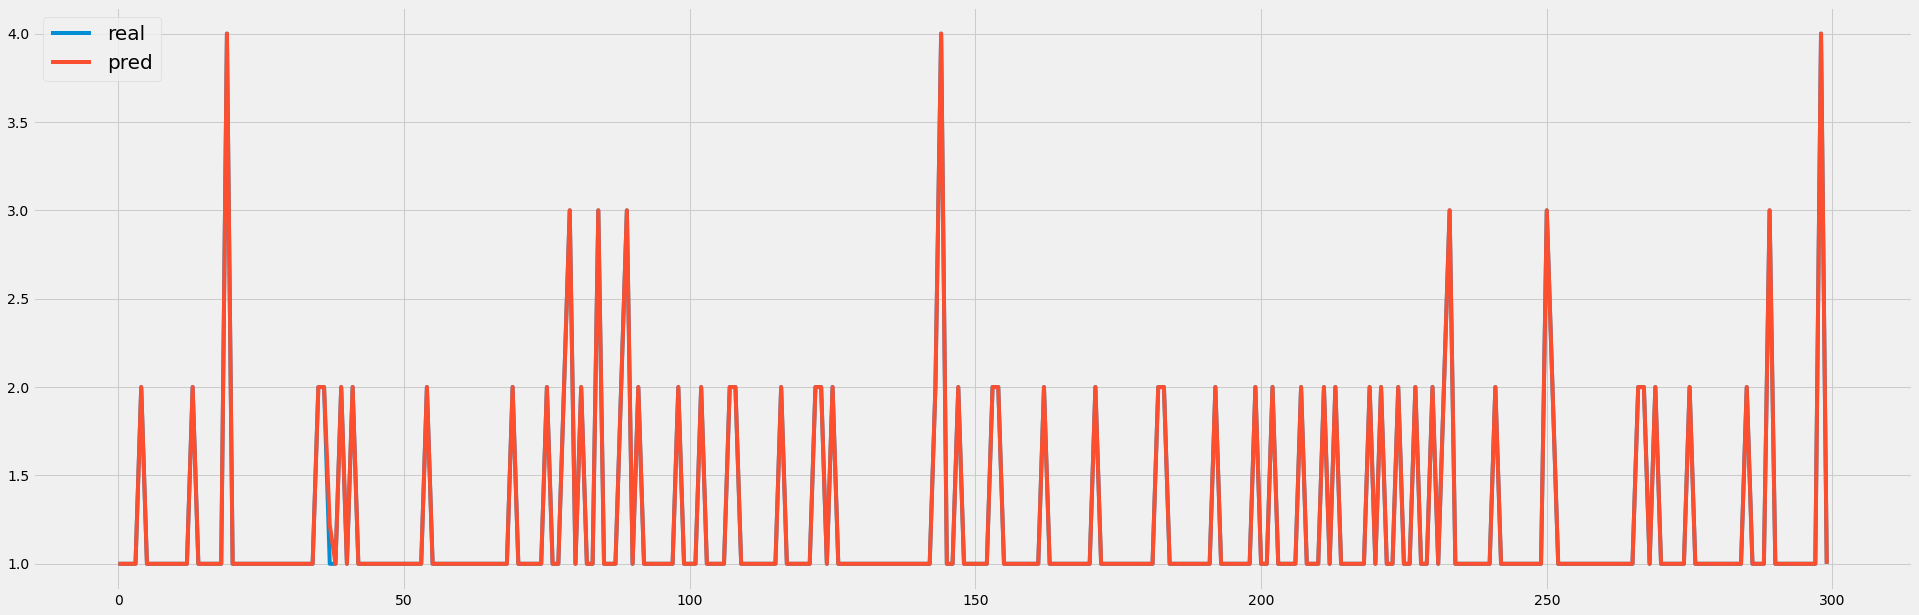

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: 

CV 정확도 점수: [0.98589013 0.96918702 0.9997662  1.         0.99999266 0.9999981
 0.99996223 0.99327542 0.99966052 1.        ]
CV 정확도: 0.995 +/- 0.010


In [ ]:
X_train, X_test, y_train, y_test = data_split(group_data, feature_names)
forest_fit()

In [ ]:
forest_top5(group_data, feature_names ,2)


 랜덤포레스트 변수:  ['발생시간', '요일']
훈련 MSE: 0.191, 테스트 MSE: 0.252
훈련 R^2: 0.062, 테스트 R^2: -0.007

 랜덤포레스트 변수:  ['발생시간', '발생년도']
훈련 MSE: 0.200, 테스트 MSE: 0.242
훈련 R^2: 0.016, 테스트 R^2: 0.033

 랜덤포레스트 변수:  ['발생시간', '발생월']
훈련 MSE: 0.187, 테스트 MSE: 0.260
훈련 R^2: 0.079, 테스트 R^2: -0.039

 랜덤포레스트 변수:  ['발생시간', '발생일자']
훈련 MSE: 0.169, 테스트 MSE: 0.279
훈련 R^2: 0.168, 테스트 R^2: -0.111

 랜덤포레스트 변수:  ['발생시간', '노면상태_대분류']
훈련 MSE: 0.001, 테스트 MSE: 0.000
훈련 R^2: 0.994, 테스트 R^2: 1.000

 랜덤포레스트 변수:  ['발생시간', '노면상태']
훈련 MSE: 0.180, 테스트 MSE: 0.239
훈련 R^2: 0.117, 테스트 R^2: 0.047

 랜덤포레스트 변수:  ['발생시간', '기상상태']
훈련 MSE: 0.015, 테스트 MSE: 0.027
훈련 R^2: 0.927, 테스트 R^2: 0.891

 랜덤포레스트 변수:  ['발생시간', '도로형태']
훈련 MSE: 0.036, 테스트 MSE: 0.060
훈련 R^2: 0.822, 테스트 R^2: 0.761

 랜덤포레스트 변수:  ['발생시간', '도로형태_대분류']
훈련 MSE: 0.141, 테스트 MSE: 0.181
훈련 R^2: 0.308, 테스트 R^2: 0.277

 랜덤포레스트 변수:  ['요일', '발생년도']
훈련 MSE: 0.203, 테스트 MSE: 0.252
훈련 R^2: 0.002, 테스트 R^2: -0.007

 랜덤포레스트 변수:  ['요일', '발생월']
훈련 MSE: 0.198, 테스트 MSE: 0.258
훈련 R^2: 0.026, 테스트 R^2: -

In [ ]:
feature_names2 =  ['기상상태', '도로형태', '도로형태_대분류','노면상태' ]
forest_top5(group_data, feature_names2 ,3)


 랜덤포레스트 변수:  ['기상상태', '도로형태', '도로형태_대분류']
훈련 MSE: 0.002, 테스트 MSE: 0.007
훈련 R^2: 0.991, 테스트 R^2: 0.972

 랜덤포레스트 변수:  ['기상상태', '도로형태', '노면상태']
훈련 MSE: 0.004, 테스트 MSE: 0.008
훈련 R^2: 0.979, 테스트 R^2: 0.968

 랜덤포레스트 변수:  ['기상상태', '도로형태_대분류', '노면상태']
훈련 MSE: 0.009, 테스트 MSE: 0.013
훈련 R^2: 0.954, 테스트 R^2: 0.946

 랜덤포레스트 변수:  ['도로형태', '도로형태_대분류', '노면상태']
훈련 MSE: 0.010, 테스트 MSE: 0.017
훈련 R^2: 0.949, 테스트 R^2: 0.930
[(0.93, ['도로형태', '도로형태_대분류', '노면상태']), (0.946, ['기상상태', '도로형태_대분류', '노면상태']), (0.972, ['기상상태', '도로형태', '도로형태_대분류']), (0.968, ['기상상태', '도로형태', '노면상태'])]


In [ ]:
# 변수를 3개씩 넣어서 돌려봐도, 모두 R^2이 높게, mse가 작게 나오는 것을 확인할 수 있죠!!